In [1]:
import os

In [5]:
base_dir = '/Users/Steini/Klosta Group/phaseSeparation/Data/LFPICSGrouped'
train_dir = os.path.join(base_dir, 'LFPICSTrain')
validation_dir = os.path.join(base_dir, 'LFPICSValidation')

# Directory with our training LFPICS0 cat pictures
train_LFPICSTrain0_dir = os.path.join(train_dir, 'LFPICSTrain0')

# Directory with our training LFPICS1 dog pictures
train_LFPICSTrain1_dir = os.path.join(train_dir, 'LFPICSTrain1')

# Directory with our validation LFPICS0 pictures
validation_LFPICSValidation0_dir = os.path.join(validation_dir, 'LFPICSValidation0')

# Directory with our validation LFPICS1 pictures
validation_LFPICSValidation1_dir = os.path.join(validation_dir, 'LFPICSValidation1')

In [6]:
train_LFPICSTrain0_fnames = os.listdir(train_LFPICSTrain0_dir)
print train_LFPICSTrain0_fnames[:10]

train_LFPICSTrain1_fnames = os.listdir(train_LFPICSTrain1_dir)
train_LFPICSTrain1_fnames.sort()
print train_LFPICSTrain1_fnames[:10]

['final_tstep_pa0_pb70_xa30_ph0.png', 'final_tstep_pa0_pb10_xa70_ph0.png', 'final_tstep_pa10_pb90_xa70_ph0.png', 'final_tstep_pa0_pb10_xa60_ph0.png', 'final_tstep_pa10_pb90_xa60_ph0.png', 'final_tstep_pa0_pb30_xa20_ph0.png', 'final_tstep_pa0_pb50_xa70_ph0.png', 'final_tstep_pa0_pb50_xa60_ph0.png', 'final_tstep_pa30_pb90_xa80_ph0.png', 'final_tstep_pa30_pb90_xa90_ph0.png']
['final_tstep_pa0_pb100_xa10_ph1.png', 'final_tstep_pa0_pb100_xa40_ph1.png', 'final_tstep_pa0_pb100_xa50_ph1.png', 'final_tstep_pa0_pb110_xa10_ph1.png', 'final_tstep_pa0_pb110_xa20_ph1.png', 'final_tstep_pa0_pb110_xa40_ph1.png', 'final_tstep_pa0_pb110_xa60_ph1.png', 'final_tstep_pa0_pb120_xa20_ph1.png', 'final_tstep_pa0_pb120_xa30_ph1.png', 'final_tstep_pa0_pb120_xa40_ph1.png']


In [7]:
print 'total training LFPICSTrain0 images:', len(os.listdir(train_LFPICSTrain0_dir))
print 'total training LFPICSTrain1 images:', len(os.listdir(train_LFPICSTrain1_dir))
print 'total validation LFPICSValidation0 images:', len(os.listdir(validation_LFPICSValidation0_dir))
print 'total validation LFPICSValidation1 images:', len(os.listdir(validation_LFPICSValidation1_dir))

total training LFPICSTrain0 images: 229
total training LFPICSTrain1 images: 635
total validation LFPICSValidation0 images: 62
total validation LFPICSValidation1 images: 156


In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

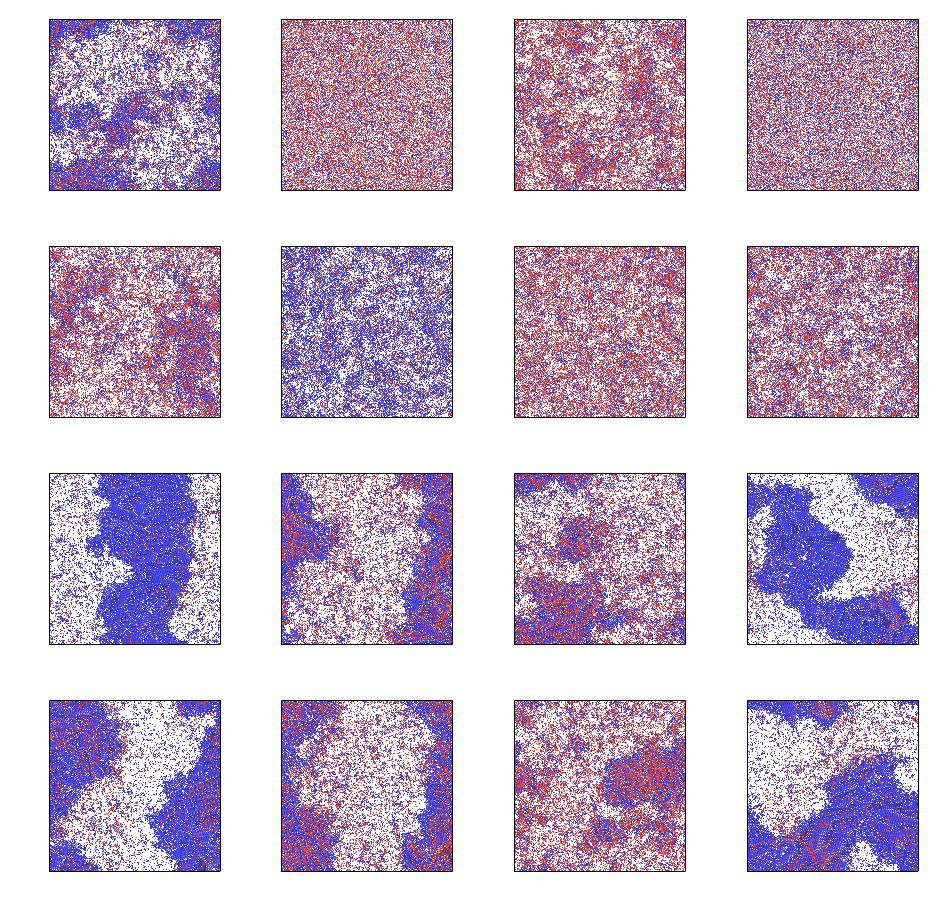

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_LFPICSTrain0_pix = [os.path.join(train_LFPICSTrain0_dir, fname) 
                for fname in train_LFPICSTrain0_fnames[pic_index-8:pic_index]]
next_LFPICSTrain1_pix = [os.path.join(train_LFPICSTrain1_dir, fname) 
                for fname in train_LFPICSTrain1_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_LFPICSTrain0_pix+next_LFPICSTrain1_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [13]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [14]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [16]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 864 images belonging to 2 classes.
Found 216 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
 - 548s - loss: 4.1994 - acc: 0.7335 - val_loss: 4.4230 - val_acc: 0.7226
Epoch 2/15
 - 521s - loss: 4.2251 - acc: 0.7350 - val_loss: 4.5365 - val_acc: 0.7154
Epoch 3/15
 - 521s - loss: 4.2324 - acc: 0.7345 - val_loss: 4.5202 - val_acc: 0.7165
Epoch 4/15
